## 12 Month Climatology Plots

<div class="alert alert-block alert-info">
Import Necessary Modules
</div>

In [6]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

<div class="alert alert-block alert-info">
Data Import
</div>

In [9]:
# Dataset already resides in Project Folder
ds_aviso = xr.open_dataset('monthly_aviso.nc')
ds_aviso

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 1440, time: 276)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2015-12-01
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12
Data variables:
    sla        (time, latitude, longitude) float64 ...

### Find Climatology

In [10]:
# Utilize groupby
ds_climo = ds_aviso.groupby('time.month').mean(dim='time')
ds_climo

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 1440, month: 12)
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sla        (month, latitude, longitude) float64 0.03086 0.03214 ... nan nan

#### 12 Month plot

Text(0.5, 0.98, 'Monthly Sea Level Anomolies from AVISO 1993-2015')

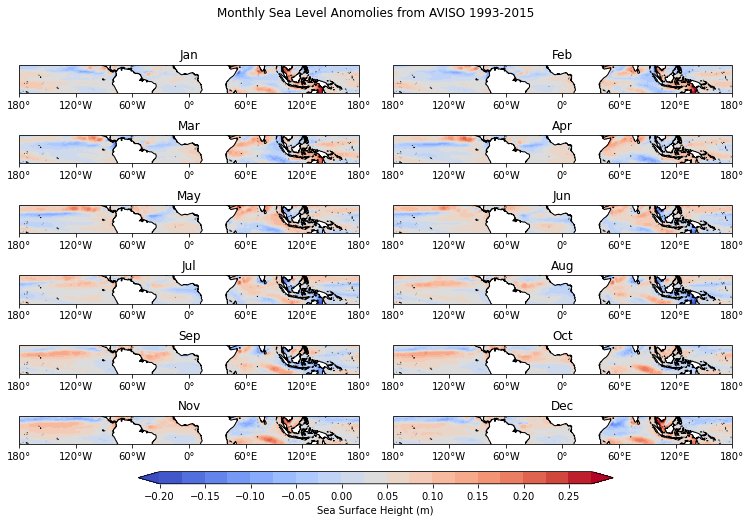

In [24]:
# Define the figure and each axis for the 4 rows and 3 columns
# Rows will be seasons
fig, axs = plt.subplots(nrows=6,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()
month_names= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#Loop over all of the months and plot
for i,months in enumerate(ds_climo["month"]):

        # Select the month (Dataset months are defined numerically)
        data=ds_climo['sla'][i]

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_climo['longitude'])

        # Contour plot
        clevs=np.arange(-.20,.30,.025)
        cs=axs[i].contourf(lons,ds_climo['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-15,15,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(month_names[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Sea Surface Height (m)')

# Add a big title at the top
plt.suptitle('Monthly Sea Level Anomolies from AVISO 1993-2015')